<a href="https://colab.research.google.com/github/Demosthene-OR/Student-AI-and-Data-Management/blob/main/01_analysis_num_variables_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://prof.totalenergies.com/wp-content/uploads/2024/09/TotalEnergies_TPA_picto_DegradeRouge_RVB-1024x1024.png" height="150" width="150">
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" >Exploratory statistics</h1> 
<h2 style = "text-align:center">Descriptive analysis of the digital variables of a dataset</h2> 
<hr style="border-width:2px;border-color:#75DFC1">

### Background and objective

> In Data Science, before starting processing and modeling, it is very important to familiarize yourself with the dataset you have available. Analyzing variables is an essential step in data exploration.
>
>
> The objective of this module is therefore to understand the basics of statistics and go a little further in their interpretation to perform exploratory statistics.
>
>
> In this first notebook, we will focus on **numerical variables**.
>
> 
> **`pandas`** , thanks to the `DataFrame` class and its methods, allows us to quickly obtain descriptive statistics for quantitative variables. This will be the main tool used to conduct these studies, presented in the first part of this notebook.
>
>
> In the second part of this notebook, we will introduce some concepts related to probability distributions, in particular the **normal distribution**. First, we will learn how to simulate data from a distribution using the **`numpy`** library.
>
>
>  Then, to check whether a variable has a distribution similar to a normal distribution, we will use a **Quantile-Quantile plot** (*QQ-plot*) with a function from the **`statsmodels.api`** library.
>
>
> To conclude this notebook, we will study the **correlation** between two numerical variables using the correlation coefficient.
>
> 

Let's start with the package import phase.

* **(a)** Import the **`pandas`** and **`numpy`** packages under their usual aliases.


* **(b)** Load the data contained in the **`‘heart.csv’`** file into a **`DataFrame`** named **`df`**.


* **(c)** Display the first 5 rows of **`df`**.



In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/data/"
# df = pd.read_csv(url+"heart.csv")
df = pd.read_csv(url+"OilWell_Production_Maintenance_1000rows.csv")
df.head()


,Date,Well_ID,Flow_bbl_day,Pressure_bar,Temperature_C,Vibration_level,Maintenance_done,Maintenance_duration_h,Incident
0,2025-01-01,W2,324,212,82,0.010,Yes,0,No
1,2025-01-02,W4,424,197,76,0.033,No,0,No
2,2025-01-03,W3,301,199,79,0.033,No,0,No
3,2025-01-04,W1,546,256,84,0.034,No,0,No
4,2025-01-05,W1,570,247,84,0.041,No,0,No



<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center" >1. Statistical series, position and dispersion indicators</h3> 
<hr style="border-width:2px;border-color:#75DFC1">

> A **statistical series** is a list of values from the same set. The order of the terms is not significant (unlike a **time series**, where the elements depend on their position in time).<br>

* **(d)** Display the unique values taken by the **`“tension”`** and **`“sex”`** columns. To do this, we can use the **`unique`** method of `Series` `pandas`. These two results constitute two statistical series (quantitative and qualitative, respectively).



In [2]:
# Quantitative statistical series:
print("Possible values for the tension (blood pressure) column :\n", df["tension"].unique())
print("--------------------------------------------------------")

# Qualitative statistical series:
print("Possible values for the sex column  :\n", df["sex"].unique())


Possible values for the tension (blood pressure) column :
 [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
--------------------------------------------------------
Possible values for the sex column  :
 ['M' 'F']



> A quick way to distinguish a quantitative variable from a qualitative variable is to look at the number of unique values taken by that variable. If this number is high, we are most likely dealing with a quantitative variable. In what follows, we will focus only on quantitative variables.
>
> To better visualize the **type** of each column in a `DataFrame` and the **number of non-missing values**, we use the **`info`** method of the `DataFrame` class, which displays a short summary of the **volume of data** contained in a `DataFrame`.

* **(e)** Display a summary of the `DataFrame` **`df`** created previously. How many variables are non-numeric? What type are they?




In [3]:
df.info()

# Three variables are non-numeric. 
# They are character strings and therefore probably qualitative.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            918 non-null    int64 
 1   sex            918 non-null    object
 2   douleur_thor   918 non-null    object
 3   tension        918 non-null    int64 
 4   cholesterol    918 non-null    int64 
 5   glycemie       918 non-null    int64 
 6   freq_card_max  918 non-null    int64 
 7   angine_effort  918 non-null    object
dtypes: int64(5), object(3)
memory usage: 57.5+ KB



> The **`dtypes`** attribute allows us to retrieve the types of variables we have in the form of a `pandas` `Series`. Since this object is a `Series`, it allows us to calculate statistics on these types using methods such as **`value_counts`**.

* **(f)** Use the **`dtypes`** attribute and the **`value_counts`** method to count the number of variables of each type present in the **`df`** `DataFrame`. This type of inspection is very common when working with large databases.



In [4]:
df.dtypes.value_counts()



int64     5
object    3
dtype: int64


> To perform a descriptive analysis of a numerical variable, we use:
>
> * **Position indicators** (mean, median, quantiles, minimum, maximum, etc.) that allow us to **locate** the values that the variable we are studying should take.
>
>
> * **Dispersion indicators** (standard deviation, variance, etc.) that describe the **variability** of the values taken by the variable we are studying.
>
> To better understand position indicators, we will refer to the following diagram:
>
> <br><br>
>
> <img src="https://assets-datascientest.s3.eu-west-1.amazonaws.com/104_stats_explo/indicateurs_positions.png" style="height:300px"> 
>
> <br><br>
>
>
> The small squares represent the values whose distribution we are studying.
> 
> A **quantile** of order $\alpha$ corresponds to a numerical value that must be **greater than** a proportion $\alpha$ of the data.
>
> For example:
> * If the quantile of order 0.10 is 1000, this means that 10% of the data is less than 1000.
> * Similarly, if a quantile of order 0.57 is 2500, this means that 57% of the data is less than 2500.
>
>
> **QUARtiles** are three special quantiles that divide a distribution into **four** intervals, each containing 25% of the data. In the diagram above, we note the quantiles $Q_1$, $Q_2$ and $Q_3$ and call them the first, second and third quartiles, respectively. These quartiles have interesting properties:
>
> * 25% of the data is below $Q_1$.
>
>
> * 50% of the data is below $Q_2$. $Q_2$ corresponds to the **median** of the distribution.
>
>
> * 75% of the data is below $Q_3$.
>
>
> * The interval from $Q_1$ to $Q_3$ contains 50% of the data. The range $(Q_3 - Q_1)$ of this interval is called the **interquartile range**. It is denoted by $IQR$ for *Inter Quartile Range*.
>
>
> * Any value **greater than** $Q_3 + 1.5 * (Q_3 - Q_1)$ (third quartile + 1.5 times the interquartile range) or **less than** $Q_1 - 1.5 * (Q_3 - Q_1)$ (first quartile - 1.5 times the interquartile range). This means that an extreme value can be very large **or** very small compared to the rest of the data.
>
> **Please note** that it is very common for the terms “extreme value” and “outlier” to be used interchangeably, but there is a clear distinction between the two.
>
> * An outlier is a value **that should not exist** or **should not be part of the distribution**. For example, if we study the height of individuals in a population, an individual with a height of -10 cm is clearly an outlier. If, by mistake, the dataset contains measurements of the height of dogs or horses (for example), these values are also outliers because they should not be in the distribution we want to study, but these values will not necessarily be extreme.
>
> 
> * An extreme value is a value that is **significantly higher or lower than the other values, but is not necessarily an outlier**. In the same example, an adult could be 2.50 m or 1.10 m tall, but these values are possible and realistic.
>
>
> In any case, **we will want to eliminate outliers from our dataset** so as not to skew our statistics. However, in some cases, we will want to keep extreme values because they are real values and removing them would skew our statistics.
>
>
> In a business setting, in an ideal situation, it is the role of the team conducting the analysis to report extreme or outlier values, and it is the role of the team in charge of data collection to determine which values are outliers and which values are extreme (however, in practice, it is difficult to have such a clear distinction between roles).
>
> The methods of the `Series` class used to calculate these indicators are summarized in the following table:
>
> | Method | Indicator | Example |
> |---:|--|:--|
> | **`mean`** | Mean | **`df[‘column’].mean()`** |
> | **`min`** | Minimum | **`df[‘column’].min()`** |
> | **`max`** | Maximum | **`df[‘column’].max()`** |
> | **`median`** | Median | **`df[‘column’].median()`** |
> | **`quantile`** | Quantile | **`df[‘column’].quantile(q=0.75)`** (returns the third quartile) <br><br> **`df[‘column’]. quantile(q=[0.1, 0.9])`** (returns the 0.1 quantile **and** the 0.9 quantile) |

* **(g)** For the column **`“cholesterol”`**, find the **minimum**, **maximum**, **median**, and **quartiles** of this variable by applying the appropriate methods.




In [5]:
print("The minimum value is: ", df['cholesterol'].min())
print("The maximum value is: ", df['cholesterol'].max())
print("The median value is: ", df['cholesterol'].median(), '\n')

q1, q2, q3 = df['cholesterol'].quantile(q=[0.25, 0.5, 0.75])

print("The quartiles are:", "q1 =", q1, ", q2 =", q2, ", q3 =", q3, '\n')


The minimum value is:  0
The maximum value is:  603
The median value is:  223.0 

The quartiles are: q1 = 173.25 , q2 = 223.0 , q3 = 267.0 




* **(h)** Calculate the range of the **interquartile range** and determine the **thresholds** above which a value will be considered **extreme**.


* **(i)** Using these thresholds, filter the `DataFrame` **`df`** to identify all individuals whose cholesterol levels are extreme values. Which levels are outliers? (We assume that a human can have a level of up to approximately 600 mg/dL, but cannot have a level of zero).



In [6]:
# Extreme values:
# Calculation of thresholds:
iqr = q3-q1
threshold_min = q1 - 1.5*iqr
threshold_max = q3 + 1.5*iqr

print("Extreme values are all values less than", threshold_min,
      "and all values greater than", threshold_max)

# Conclusions:
print("""
• Individuals whose cholesterol levels are above the interquartile range 
have realistic values. \033[1mThese are not outliers. \033[0m“”")
display(df[df[‘cholesterol’] > threshold_max])
""")


print("""
• Individuals whose cholesterol levels are below the interquartile range 
all have cholesterol levels of zero, which is impossible. 
\033[1mThese are therefore outliers.\033[0m
""")
display(df[df['cholesterol'] < threshold_min])


Extreme values are all values less than 32.625 and all values greater than 407.625

• Individuals whose cholesterol levels are above the interquartile range 
have realistic values. These are not outliers. “”")
display(df[df[‘cholesterol’] > threshold_max])


• Individuals whose cholesterol levels are below the interquartile range 
all have cholesterol levels of zero, which is impossible. 
These are therefore outliers.



,age,sex,douleur_thor,tension,cholesterol,glycemie,freq_card_max,angine_effort
293,65,M,ASY,115,0,0,93,Y
294,32,M,TA,95,0,1,127,N
295,61,M,ASY,105,0,1,110,Y
296,50,M,ASY,145,0,1,139,Y
297,57,M,ASY,110,0,1,131,Y
...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,120,N
515,63,M,NAP,130,0,1,160,N
518,48,M,NAP,102,0,1,110,Y
535,56,M,ASY,130,0,0,122,Y



> The **mean** of a numerical statistical series $X = (x_1, x_2, ..., x_n)$ is given by the formula:
>
>
> $$\hat{X}= \displaystyle \frac{1}{n} \sum_{i=1}^{n} x_i$$
>
> where:
> * $n$ is the **size** of the sample
>
> * $x_i$ are the **values** of the sample.
>
> The mean of a series is therefore simply the sum of the sample values divided by the size of the sample.

* **(j)** Calculate the mean of the **`"cholesterol"`** column.


* **(k)** Compare this mean to the median of the column. How could we explain this difference?




In [7]:
# Calculation “by hand”:
X = df["cholesterol"]
n = len(X) # sample size
mean_X = (1/n)*np.sum(X)
print("Mean calculated 'by hand': ", mean_X)

# Quick command in Python:
mean_X2 = df["cholesterol"].mean()
print("Mean calculated with Python command: ", mean_X2)
print("\n")

# median median versus:
print("The median  is equal to", q2, "and is higher than the mean.")

print('''
The mean is influenced by extreme values. 
It is lower than the median because there are many extremely low values 
(172 values equal to 0 versus 11 values greater than {}) that “pull” the mean down.
'''.format(threshold_max))


Mean calculated 'by hand':  198.79956427015253
Mean calculated with Python command:  198.7995642701525


The median  is equal to 223.0 and is higher than the mean.

The mean is influenced by extreme values. 
It is lower than the median because there are many extremely low values 
(172 values equal to 0 versus 11 values greater than 407.625) that “pull” the mean down.




> **The median is much more robust to extreme values**, making it a much more **reliable** position indicator in practice. The same is true for quantiles in general. In practice, quantiles of order 0.05 and 0.95 are better indicators of the range of the distribution than the minimum or maximum.
>
>
We will now attempt to visualize the distribution of a variable using a very specific type of graph: **boxplots**.
>
>
> A boxplot seeks to **visually represent a distribution using position and dispersion indicators.**
>
> The indicators represented in a boxplot are as follows:
>
> * **Position**: The first quartile $Q_1$, the median or second quartile $Q_2$, and the third quartile $Q_3$.
>
>
> * **Dispersion**: The interquartile range $IQR$.
>
> Here is an explanatory diagram of the boxplot: 
>
> <img src = "https://assets-datascientest.s3.eu-west-1.amazonaws.com/104_stats_explo/boxplot_explained.png" style="height:300px">
>
> The whiskers represent the range of values that are considered *normal*. **Beyond these whiskers**, the points represented are considered **extreme values**.
>
> Here is an example of a boxplot plotted with Python for the variable **`“cholesterol”`** from our dataset:
> 
> <img src = "https://assets-datascientest.s3.eu-west-1.amazonaws.com/104_stats_explo/boxplot_cholesterol.png" style="height:200px">
>
> There are several elements of interest when reading a boxplot:
>
> * **Is the interquartile range small?** If so, this means that the distribution of the variable is concentrated around the median. If not, the distribution is more dispersed.
>
>
> * **Are there any extreme values?** If so, they will need to be inspected to determine whether they are extreme or outliers.
>
> Using the boxplot of the variable `“cholesterol”`, we could have directly and visually determined that the lower extreme values are **outliers** (because they are all equal to 0), while the upper **extreme values** are simply exceptional individuals, because their values are realistic.
>
> With Python, the easiest way to plot a boxplot is to use the **`seaborn`** library and its **`boxplot`** function. In the rest of the training, you will learn more about using seaborn.
>
> ```py
> # Import the seaborn library under the alias sns
> import seaborn as sns
>
> # Plotting a boxplot from the values in the “cholesterol” column
> sns.boxplot(df[‘cholesterol’])
> ```

* **(l)** Import the **`seaborn`** library under the alias **`sns`**. <br>
Using the **`.boxplot()`** command, display the boxplot of the variable **`“cholesterol”`** and add the mean to the boxplot.
`



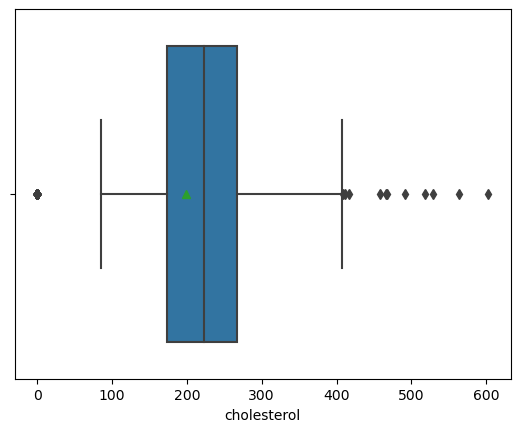

In [8]:
import seaborn as sns

sns.boxplot(x = df["cholesterol"],showmeans=True);



> Like the mean, the **standard deviation** is an indicator that is not represented graphically in a boxplot. The standard deviation measures the dispersion of data in a sample. In the following image, we can see how the distribution changes when the standard deviation (denoted by the letter sigma: **$\sigma$**) varies for values of $5,10$ and $20$.
> <img src="https://assets-datascientest.s3.eu-west-1.amazonaws.com/104_stats_explo/sigmas_bon.png" style="height:300px"> 
>
> The greater the standard deviation, the more dispersed the data and the flatter the curve. <br>
> The blue curve ($\sigma = 20$) is much flatter than the yellow curve ($\sigma = 5)$.
>
> Mathematically, the **standard deviation** of a numerical statistical series $X = (x_1, x_2, ..., x_n)$ is calculated using the following formula: <br>
>
> $$\hat \sigma_{X}= \sqrt{\frac{1}{n} \displaystyle \sum_{i=1}^{n} (x_i-\hat X)^2}$$
> where: <br>
> * $n =$ the sample size
>
>* $x_i$ are the **values** of the series 
>
> * $\hat X =$ the mean.


* **(m)** As before, calculate the standard deviation of the **`“cholesterol”`** column “by hand” and then using the **`std`** method.


In [9]:
# calculation by hand: 
X = df["cholesterol"]
n = len(X) # sample size
std_X = np.sqrt((1/n)*sum((X-mean_X)**2))
print("Standard deviation calculated 'by hand': ", std_X )

# Quick command in Python: 
std_X2 = df["cholesterol"].std()
print("Standard deviation calculated with the Python command: ", std_X2)


Standard deviation calculated 'by hand':  109.32455089779246
Standard deviation calculated with the Python command:  109.38414455220337




* **(n)** To obtain the values of all these indicators for each numeric column of the `Dataframe`, you can directly use the **`describe`** method of `pandas.DataFrame`.





In [10]:
df.describe()


,age,tension,cholesterol,glycemie,freq_card_max
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368
std,9.432617,18.514154,109.384145,0.423046,25.460334
min,28.000000,0.000000,0.000000,0.000000,60.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000



<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center" >  2. Normal distribution and data simulation</h3>  
<hr style="border-width:2px;border-color:#75DFC1">

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
Much of the data used every day is very similar to variations of common probability distributions or combinations of distributions. That is why it is always useful to know how to <strong>simulate</strong> data from a <strong>theoretical probability</strong> distribution (normal, exponential, etc.).</div>


> The **normal distribution**, often denoted $\mathcal{N}(\mu, \sigma^2)$, is a **continuous** probability distribution, meaning that it takes values in an infinite set. It depends on two parameters: $\mu$ (the Greek letter *mu*, representing the theoretical mean) and $\sigma$ (the Greek letter *sigma*, representing the theoretical standard deviation). 
>
>The **standard normal distribution** is a special case of the normal distribution with $\mu = 0$ (centered around 0) and $\sigma = 1$ (standardized).
>
> Here is the distribution of a **centered theoretical normal distribution ($\mu = 0$)**, denoted by $\mathcal{N}(\mu=0, \sigma^2)$:
>
>
> <img src="https://assets-datascientest.s3.eu-west-1.amazonaws.com/104_stats_explo/bell_curve.png" style="height:200px"> 
>
> When looking at a probability density, to represent probabilities, one must always think in terms of **s
> 
> When looking at a probability density, to visualize probabilities, you must always think in terms of the **area** under the density curve. The area represents the probabilities of events. The total area under the curve (here, the sum of all the blue fragments) is equal to $1$. <br>
>
> We also note that much of the data from this distribution is close to $0$ because the area under the curve is large around this value. Whereas for values greater than $+2\sigma$ and less than $-2\sigma$, which correspond to the areas in **light blue**, the area under the curve decreases more and more, so the probability of obtaining such values is lower.
>
<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
    To simulate a distribution in Python, use
    <code>np.random.normal(mu = ..., sigma = ..., size = ...)</code>
    and specify the values of the parameters specific to the distribution.
</div>

* **(o)** Simulate $100$ draws (to be specified in the **`size`** parameter) from a centered normal distribution (to be specified in the **`mu`** parameter) and reduced (to be specified in the **`sigma`** parameter).  


> We can display a histogram from a sample using the **`.histplot()`** command from the **`seaborn`** library: 
> 
> ```py
> sns.histplot(sample)
> ```

* **(p)** Using the **`.histplot()`** command from the **`seaborn`** library, display the histogram of this variable. If you re-execute the cell, you will get a different histogram because your data has been re-generated.




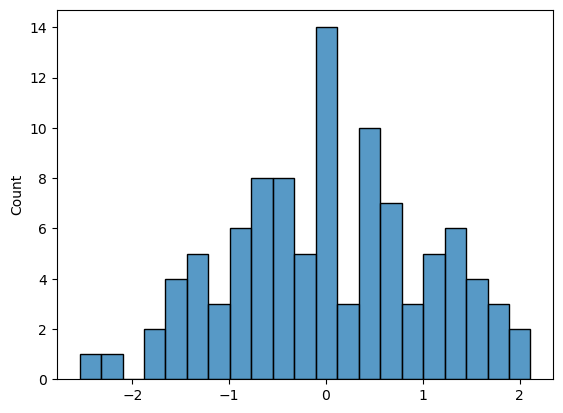

In [11]:
mu, sigma = 0, 1
sn_distribution = np.random.normal(mu, sigma, size = 100)
sns.histplot(sn_distribution,bins=21);



<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
    Since we are working with <b>simulated data</b>, the simulated distribution differs from the theoretical distribution. However, both distributions follow the same trend, and the more data there is, the closer the simulated histogram gets to the theoretical distribution. You can try increasing the <strong> <code>size</code></strong> parameter, for example to $10000$, and observe the histogram.





> The simulated values change each time you run the cell because they are new draws from the same distribution. If you always want to keep the same sample, you can use the **`np.random.seed()`** function and choose a **`seed`** parameter equal to any integer.

* **(q)** Repeat the same question, increasing the sample size to $10,000$ and specifying an integer for the value of **`seed`** before generating your data. Now your experiment is reproducible; if you re-run the cell, you will get the same distribution.

Translated with DeepL.com (free version)



We observe that the more data we have from a normal distribution,
the closer the histogram approaches the probability distribution of a theoretical normal distribution.


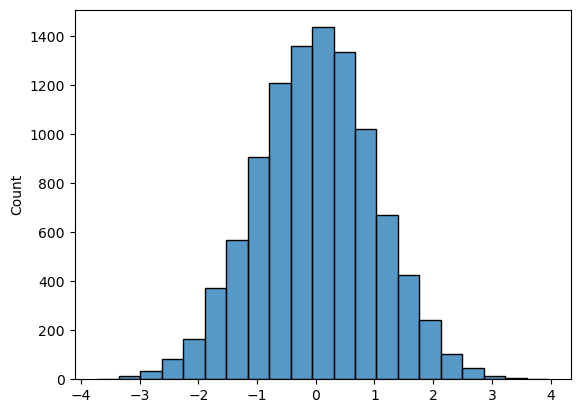

In [13]:
print("We observe that the more data we have from a normal distribution," + "\n" +
    "the closer the histogram approaches the probability distribution of a theoretical normal distribution.")

np.random.seed (15)
sn_distribution = np.random.normal(mu, sigma, 10000)
sns.histplot(sn_distribution, bins=21);



<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center" > 3. Data normality</h3>  
<hr style="border-width:2px;border-color:#75DFC1">

> The **Q-Q plot**, or **quantile** graph, allows us to compare the **theoretical quantiles of a distribution (by default those of a normal distribution)** with the quantiles of the **sample provided**. 
>- If the sample data comes from a normal distribution, we expect this graph to be **close to a straight line (called the first bisector) that forms** a $45°$ angle with the x-axis. This is because the quantiles of the sample will be similar to the theoretical quantiles of a normal distribution. If the sample data comes from a different distribution, we will not obtain points aligned on the first bisector.
>
> <img src = "https://assets-datascientest.s3.eu-west-1.amazonaws.com/104_stats_explo/qqplot.png" style = "height:1000px">
>
> ```py
> # Import the statsmodels.api library
> import statsmodels.api as sm
>
> # Create the Q-Qplot 
> sm.qqplot(sample, fit = True, line = ‘45’)
> ```
>
>- The argument **`line = '45'`** displays the first bisector in red.
>
>- The argument **`fit = True`** centers and reduces the sample data.
> 

* **(r)** Generate a sample **`ech`** of $100$ data points from a normal distribution with $\mu = 12$ and $\sigma = 3$. <br>  


* **(s)** Import **`statsmodels.api`** under the alias **`sm`** and apply the **`qqplot`** function from the **`statsmodels.api`** library to **`ech`**, specifying the parameter **`line = ‘45’`** and normalizing the data. 

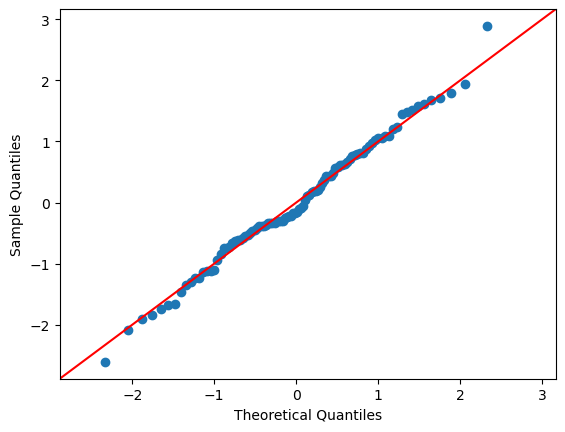

In [14]:
import statsmodels.api as sm

ech = np.random.normal(12, 3, 100)
sm.qqplot(ech, fit = True, line = '45');
# Note that if we remove the parameter fit = True, we do not observe 
# any similarities between ech and a centered and reduced normal distribution,
# which is normal because ech was generated by a normal distribution with a mean of 3 and a standard deviation of 3.




> This distribution approximates a normal distribution despite slight distortions at the tails.
Furthermore, the alignment is not perfect despite the fact that the sample comes from independent draws from a normal distribution, because we are comparing theoretical quantiles with empirical quantiles, i.e., those derived from a sample.
Finally, we note that if we increase the sample size to $1000$ or $10000$, we can obtain points that are much more aligned around the red line.
>
* **(t)** Using the **`select_dtypes`** method, select only the numeric columns (**`int`** or **`float`**) of the **`df`** in a new `Dataframe` **`var_num`**.





In [15]:
var_num = df.select_dtypes(include = ['int', 'float'])






* **(u)** To identify columns in the `DataFrame` **`df`** that approximate a normal distribution, display a Q-Q plot for each numeric column using a loop and determine which columns appear to follow a normal distribution.





age
tension
cholesterol
glycemie
freq_card_max


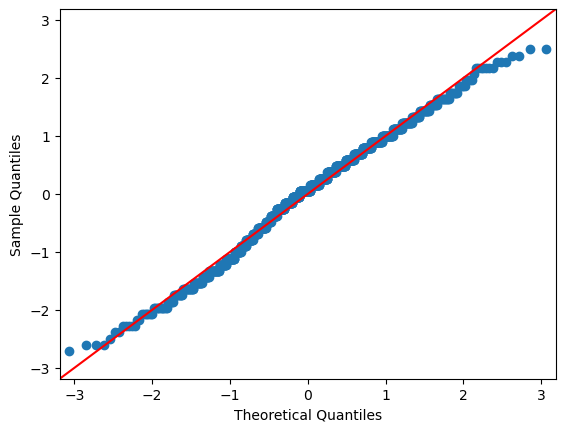

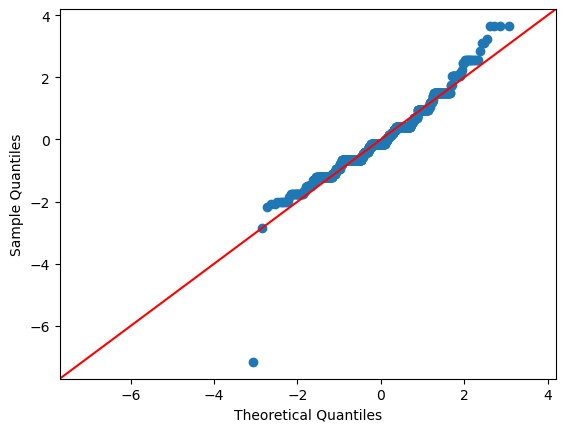

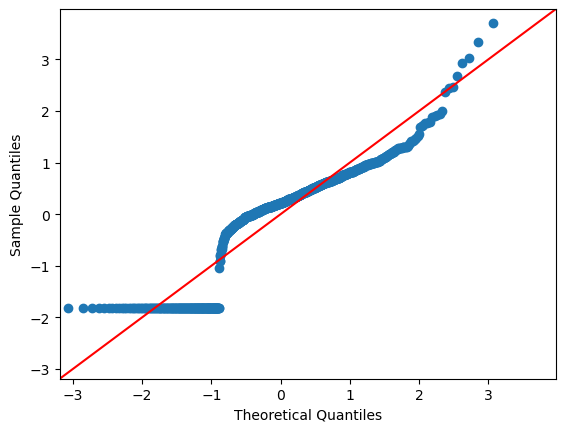

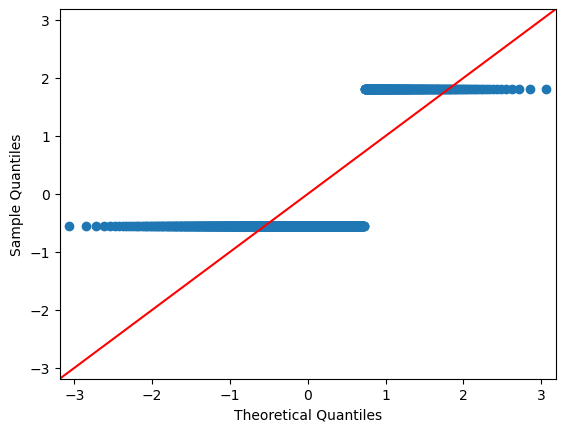

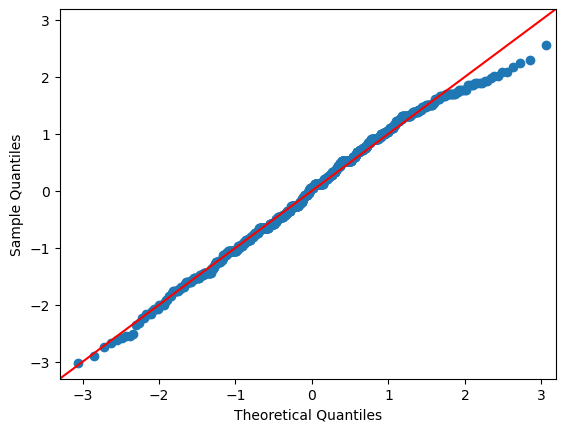

In [16]:
# Loop to display the Q-Q plots: 
for column in var_num.columns:
    print(column)
    sm.qqplot(var_num[column], line='45', fit = True)

# The variables age and max_card_freq appear to follow normal distributions




<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center" > 4. Correlation between two numerical variables</h3>  
<hr style="border-width:2px;border-color:#75DFC1">

> The correlation between two numerical variables $X$ (e.g., a person's age) and $Y$ (e.g., their height) allows us to quantify the relationship between the values of these two variables.
> The correlation, denoted by $r$, is given by the formula:
>
> $$\hat r(X,Y) = \dfrac{\hat {\mathrm{cov}}(X,Y)}{\hat\sigma_X \times \hat\sigma_Y}$$
> where:
>
> * $\hat{\mathrm{cov}}(X,Y)$ is the covariance between $X$ and $Y$
>
> * $\hat \sigma_X$ is the standard deviation of $X$
>
> * $\hat \sigma_Y$ is the standard deviation of $Y$.
>
> By definition, the correlation **always** takes values between $[-1,1]$. We refer to a correlation as:
> * **strong** if $\hat r \in [-1, -0.5] \text{ or } [0.5, 1]$ 
> * or **weak** if $\hat r \in [-0.5, 0] \text{ or } [0, 0.5]$. <br>


<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;     
It should be noted that these thresholds are for informational purposes only and that the interpretation of a correlation coefficient depends on the context and objectives. A correlation of 0.9 may be <strong>very low</strong> when testing quantities of <strong>chemical substances</strong> using high-quality instruments, but may be considered <strong>very high</strong> in the <strong>social sciences</strong>, where there may be a greater contribution from complicating factors.</div>
<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
Correlation is a measure that is <strong>sensitive</strong> to extreme values.</div>


> Graphically, three different configurations can be distinguished: <br>
> <img src="https://assets-datascientest.s3.eu-west-1.amazonaws.com/104_stats_explo/corr_drawio.png" style="height:200px">   
>
>
> With the **`numpy`** library, we can calculate the correlation between two variables.
> ```py
> # Calculate the correlation between X and Y
> np.corrcoef(X, Y)
> ```
> The result returns a correlation matrix that corresponds to:
$ 
\begin{bmatrix} 
\hat r(X,X) = 1 & \hat r(X,Y) \\
\hat r(Y, X) & \hat r(Y,Y) = 1\\
\end{bmatrix}
$.
>
> Note that the diagonal is always made up of values equal to $1$ because we are calculating the correlation between a variable and itself.

* **(v)** Calculate the correlation between the **"tension"** and **"cholesterol"** columns.

In [17]:
np.corrcoef(df["tension"], df["freq_card_max"])




array([[ 1.      , -0.112135],
       [-0.112135,  1.      ]])


* **(w)** You can also use the **`corr`** method of the `DataFrame` class to display the correlations between all the different numerical variables. Display these correlations.





In [19]:
df.corr(numeric_only=True)




,age,tension,cholesterol,glycemie,freq_card_max
age,1.000000,0.254399,-0.095282,0.198039,-0.382045
tension,0.254399,1.000000,0.100893,0.070193,-0.112135
cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792
glycemie,0.198039,0.070193,-0.260974,1.000000,-0.131438
freq_card_max,-0.382045,-0.112135,0.235792,-0.131438,1.000000



<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
Finally, be careful not to confuse correlation with causation. <br>
Correlation means that there is a statistical association between variables. Causality means that a change in one variable causes a change in another variable, which is a more powerful property.</div>

